In [1]:
import pickle
from xgboost import XGBClassifier
import pandas as pd

In [ ]:
#將train_feature_dict(99個csv,36個df)壓縮成df
#轉換型態

for i in train_feature_dict:
    train_feature_dict[i]=train_feature_dict[i].astype("float64")

In [2]:
feature_name=["CpuTemperature_3","DurationPickToPick_6","DurationRobotFromFeederToTestBench_6",
                                     "DurationRobotFromTestBenchToFeeder_6","DurationTestBenchClosed_6",
                                     "EPOSPosition_6","FeederAction2_0","FeederAction4_0","FeederBackgroundIlluminationIntensity_6","FuseCycleDuration_6",
                                     "FuseHeatSlope_0","FuseHeatSlopeNOK_6","FuseHeatSlopeOK_6","FuseIntoFeeder_0",
                                     "FusePicked_6","FuseTestResult_6","Humidity_0","IntensityTotalImage_0",
                                     "IntensityTotalThermoImage_6","LightBarrierActiveTaskDuration1_6","NumberEmptyFeeder_0",
                                     "NumberFuseDetected_6","NumberFuseEstimated_6","Pressure_6","ProcessCpuLoadNormalized_3",
                                     "ProcessMemoryConsumption_3","SharpnessImage_6","SmartMotorPositionError_6",
                                     "SmartMotorSpeed_6","Temperature_0","TemperatureThermoCam_6","TotalCpuLoadNormalized_3",
                                     "TotalMemoryConsumption_3","Vacuum_6","VacuumFusePicked_6","VacuumValveClosed_6"]

In [3]:
with open('Step_1_train_model.pickle', 'rb') as handle:
        train_feature_dict= pickle.load(handle)
for i in feature_name:
        y=train_feature_dict[i]["Label"]
        x=train_feature_dict[i].drop(["Label"],axis=1)
        model = XGBClassifier()
        model.fit(x, y,eval_metric = "logloss")
        with open(i+'.pickle', 'wb') as handle:
            pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

D:\anaconda\envs\ML_class\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Train_2 pickle

In [66]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from keras.utils.np_utils import *
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
path_name = r"C:\Users\user\PHM\dataset\.ipynb_checkpoints"
files = os.listdir(path_name)
files.pop()
#files.append("df_12_3_data.csv")
data_dict={}
for i in files:
    print(i)
    df=pd.read_csv(i,index_col=[0])  
    df = df.fillna(0)
    if len(df.columns) != 247:
        df["NumberFuseDetected_6"] = 0        
    df=pd.DataFrame(data=df,columns=["CpuTemperature_3","DurationPickToPick_6","DurationRobotFromFeederToTestBench_6",
                                     "DurationRobotFromTestBenchToFeeder_6","DurationTestBenchClosed_6",
                                     "EPOSPosition_6","FeederAction2_0","FeederAction4_0","FeederBackgroundIlluminationIntensity_6","FuseCycleDuration_6",
                                     "FuseHeatSlope_0","FuseHeatSlopeNOK_6","FuseHeatSlopeOK_6","FuseIntoFeeder_0",
                                     "FusePicked_6","FuseTestResult_6","Humidity_0","IntensityTotalImage_0",
                                     "IntensityTotalThermoImage_6","LightBarrierActiveTaskDuration1_6","NumberEmptyFeeder_0",
                                     "NumberFuseDetected_6","NumberFuseEstimated_6","Pressure_6","ProcessCpuLoadNormalized_3",
                                     "ProcessMemoryConsumption_3","SharpnessImage_6","SmartMotorPositionError_6",
                                     "SmartMotorSpeed_6","Temperature_0","TemperatureThermoCam_6","TotalCpuLoadNormalized_3",
                                     "TotalMemoryConsumption_3","Vacuum_6","VacuumFusePicked_6","VacuumValveClosed_6"])
    name = i.split("_")[1]
    if int(name) == 2:
        df["Label"] = 0
    elif int(name) == 3:
        df["Label"] = 1
    elif int(name) == 4:
        df["Label"] = 2
    elif int(name) == 5:
        df["Label"] = 3
    elif int(name) == 7:
        df["Label"] = 4
    elif int(name) == 9:
        df["Label"] = 5
    elif int(name) == 11:
        df["Label"] = 6
    elif int(name) == 12:
        df["Label"] = 7
        
    data_dict[i.split(".")[0]] = df   ## dictionary： data_dict ,key：df_ 2_2_data

df_ 2_0_data.csv
df_ 2_2_data.csv
df_ 2_3_data.csv
df_ 2_4_data.csv
df_ 3_0_data.csv
df_ 3_2_data.csv
df_ 3_3_data.csv
df_ 3_4_data.csv
df_ 4_1_data.csv
df_ 4_2_data.csv
df_ 4_4_data.csv
df_ 5_0_data.csv
df_ 5_2_data.csv
df_ 5_3_data.csv
df_ 5_4_data.csv
df_ 7_0_data.csv
df_ 7_2_data.csv
df_ 7_3_data.csv
df_ 7_5_data.csv
df_ 9_1_data.csv
df_ 9_2_data.csv
df_ 9_3_data.csv
df_ 9_5_data.csv
df_11_0_data.csv
df_11_1_data.csv
df_11_3_data.csv
df_12_0_data.csv
df_12_1_data.csv
df_12_3_data.csv


In [67]:
def turntoficture_dict(df_dict,time_steps):
    feature_dict = {}
    seq_X, seq_y = [], []
    for col in range(36):
        for key in df_dict:
            feature = df_dict[key].iloc[:,col]
            y = df_dict[key]["Label"]
            
            for j in range(feature.shape[0] - time_steps):
                X_70 = np.array(feature.iloc[j:j+time_steps])
                seq_X.append(X_70)
                
                y_label = np.array(y[j+time_steps]).astype(int)
                seq_y.append(y_label)
        name = df_dict[key].columns[col]
        X = np.asarray(seq_X)
        y = to_categorical(np.asarray(seq_y),num_classes = 8,dtype = 'int64')
        feature_dict[name] = [X,y]
        seq_X, seq_y = [], []
    return feature_dict

In [68]:
train_feature_dict = turntoficture_dict(data_dict,70)

In [ ]:
a=data_dict['df_ 2_0_data.csv']

In [47]:
def Select_feature(df): #36 features
    df=pd.DataFrame(data=df,columns=["CpuTemperature_3","DurationPickToPick_6","DurationRobotFromFeederToTestBench_6",
                                     "DurationRobotFromTestBenchToFeeder_6","DurationTestBenchClosed_6",
                                     "EPOSPosition_6","FeederAction2_0","FeederAction4_0","FeederBackgroundIlluminationIntensity_6","FuseCycleDuration_6",
                                     "FuseHeatSlope_0","FuseHeatSlopeNOK_6","FuseHeatSlopeOK_6","FuseIntoFeeder_0",
                                     "FusePicked_6","FuseTestResult_6","Humidity_0","IntensityTotalImage_0",
                                     "IntensityTotalThermoImage_6","LightBarrierActiveTaskDuration1_6","NumberEmptyFeeder_0",
                                     "NumberFuseDetected_6","NumberFuseEstimated_6","Pressure_6","ProcessCpuLoadNormalized_3",
                                     "ProcessMemoryConsumption_3","SharpnessImage_6","SmartMotorPositionError_6",
                                     "SmartMotorSpeed_6","Temperature_0","TemperatureThermoCam_6","TotalCpuLoadNormalized_3",
                                     "TotalMemoryConsumption_3","Vacuum_6","VacuumFusePicked_6","VacuumValveClosed_6"])
    return df

In [48]:
def Test_feature(df,time_steps):
    X = pd.DataFrame()
    test_feature_dict = {}
    df = df.fillna(0)  
    if len(df.columns) != 247:
        df["NumberFuseDetected_6"] = 0   
    df = Select_feature(df)  ## Select_feature to 36
    for i in range(36):
        feature = df.iloc[:,i]
        for j in range(feature.shape[0] - time_steps):
            time_step = np.array(df.iloc[j:j+time_steps,i])
            time_df = pd.DataFrame(time_step)
            time_df = time_df.T
            X = pd.concat([X,time_df],ignore_index = True)
        test_feature_dict[df.columns[i]] = X
        X = pd.DataFrame()
    test_feature_dict[df.columns[i]]=test_feature_dict[df.columns[i]].astype("float64")
    return test_feature_dict

In [49]:
df =pd.read_csv('df_ 2_0_data.csv')
df=Test_feature(df,70)


In [61]:
from pandas import DataFrame
row_list = []
for i in range(df.shape[0]):
    row =pd.DataFrame(df.iloc[i,:])          
    row = np.array(row)
    row_list.append(row)
x_test = np.asarray(row_list)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [62]:
x_test

array([[[46.19444444],
        [47.125     ],
        [46.075     ],
        ...,
        [43.275     ],
        [42.8       ],
        [43.2       ]],

       [[47.125     ],
        [46.075     ],
        [45.975     ],
        ...,
        [42.8       ],
        [43.2       ],
        [42.8       ]],

       [[46.075     ],
        [45.975     ],
        [43.475     ],
        ...,
        [43.2       ],
        [42.8       ],
        [43.025     ]],

       ...,

       [[44.1       ],
        [43.525     ],
        [43.1       ],
        ...,
        [44.45      ],
        [43.9       ],
        [43.95      ]],

       [[43.525     ],
        [43.1       ],
        [43.95      ],
        ...,
        [43.9       ],
        [43.95      ],
        [44.025     ]],

       [[43.1       ],
        [43.95      ],
        [42.725     ],
        ...,
        [43.95      ],
        [44.025     ],
        [43.475     ]]])

In [69]:
# Modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D, Flatten
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
def model_training(train_feature_dict,feature):
    x_train, y_train = train_feature_dict[feature][0], train_feature_dict[feature][1]
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    model = Sequential()
    model.add(Conv1D(filters = 64,kernel_size = 10,strides = 1,input_shape = (70,1)))
    model.add(MaxPooling1D(pool_size = 10))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()
    model.fit(x_train, y_train, batch_size=64, epochs=500)
    return model

In [70]:
feature_list = ["CpuTemperature_3","DurationPickToPick_6","DurationRobotFromFeederToTestBench_6",
                                     "DurationRobotFromTestBenchToFeeder_6","DurationTestBenchClosed_6",
                                     "EPOSPosition_6","FeederAction2_0","FeederAction4_0","FeederBackgroundIlluminationIntensity_6","FuseCycleDuration_6",
                                     "FuseHeatSlope_0","FuseHeatSlopeNOK_6","FuseHeatSlopeOK_6","FuseIntoFeeder_0",
                                     "FusePicked_6","FuseTestResult_6","Humidity_0","IntensityTotalImage_0",
                                     "IntensityTotalThermoImage_6","LightBarrierActiveTaskDuration1_6","NumberEmptyFeeder_0",
                                     "NumberFuseDetected_6","NumberFuseEstimated_6","Pressure_6","ProcessCpuLoadNormalized_3",
                                     "ProcessMemoryConsumption_3","SharpnessImage_6","SmartMotorPositionError_6",
                                     "SmartMotorSpeed_6","Temperature_0","TemperatureThermoCam_6","TotalCpuLoadNormalized_3",
                                     "TotalMemoryConsumption_3","Vacuum_6","VacuumFusePicked_6","VacuumValveClosed_6"]

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
for i in feature_list:
    model=model_training(train_feature_dict,i)
    print(i)
    model.save(i+"_2")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 61, 64)            704       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
Total params: 1,224
Trainable params: 1,224
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
300/300 [==============================] - 1s 3ms/step - loss: 5.6141 - accuracy: 0.1300
Epoch 2/500
300/3

In [72]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("CpuTemperature_3_2")

In [73]:
reconstructed_model.predict_classes(x_test)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4,
       4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int64)

In [65]:
model.predict_classes(x_test)

array([0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int64)

## Train_1 pickle

In [1]:
import pandas as pd
import os
import numpy as np
from numpy import array
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pickle
import time

In [6]:
path_name = r"C:\Users\user\PHM\dataset\.ipynb_checkpoints"
files = os.listdir(path_name)
files.pop()
files.append("df_12_3_data.csv")
list_df = []
df_dict={}
for i in files:
    print(i)
    df=pd.read_csv(i,index_col=[0])
    df_dict[i.split(".")[0]] = df

df_ 0_0_data.csv
df_ 0_100_data.csv
df_ 0_101_data.csv
df_ 0_103_data.csv
df_ 0_10_data.csv
df_ 0_11_data.csv
df_ 0_13_data.csv
df_ 0_17_data.csv
df_ 0_18_data.csv
df_ 0_19_data.csv
df_ 0_1_data.csv
df_ 0_20_data.csv
df_ 0_23_data.csv
df_ 0_25_data.csv
df_ 0_26_data.csv
df_ 0_27_data.csv
df_ 0_28_data.csv
df_ 0_29_data.csv
df_ 0_31_data.csv
df_ 0_32_data.csv
df_ 0_35_data.csv
df_ 0_36_data.csv
df_ 0_37_data.csv
df_ 0_38_data.csv
df_ 0_41_data.csv
df_ 0_42_data.csv
df_ 0_43_data.csv
df_ 0_44_data.csv
df_ 0_45_data.csv
df_ 0_46_data.csv
df_ 0_47_data.csv
df_ 0_49_data.csv
df_ 0_51_data.csv
df_ 0_53_data.csv
df_ 0_54_data.csv
df_ 0_55_data.csv
df_ 0_56_data.csv
df_ 0_57_data.csv
df_ 0_58_data.csv
df_ 0_5_data.csv
df_ 0_60_data.csv
df_ 0_61_data.csv
df_ 0_64_data.csv
df_ 0_66_data.csv
df_ 0_67_data.csv
df_ 0_69_data.csv
df_ 0_6_data.csv
df_ 0_73_data.csv
df_ 0_74_data.csv
df_ 0_75_data.csv
df_ 0_76_data.csv
df_ 0_77_data.csv
df_ 0_7_data.csv
df_ 0_80_data.csv
df_ 0_81_data.csv
df_ 0_82_dat

In [7]:
len(files)

99

In [8]:
for i in df_dict:
    df_dict[i]=df_dict[i].fillna(0)

In [9]:
def Select_feature(df): #36個特徵
    df=pd.DataFrame(data=df,columns=["CpuTemperature_3","DurationPickToPick_6","DurationRobotFromFeederToTestBench_6",
                                     "DurationRobotFromTestBenchToFeeder_6","DurationTestBenchClosed_6",
                                     "EPOSPosition_6","FeederAction2_0","FeederAction4_0","FeederBackgroundIlluminationIntensity_6","FuseCycleDuration_6",
                                     "FuseHeatSlope_0","FuseHeatSlopeNOK_6","FuseHeatSlopeOK_6","FuseIntoFeeder_0",
                                     "FusePicked_6","FuseTestResult_6","Humidity_0","IntensityTotalImage_0",
                                     "IntensityTotalThermoImage_6","LightBarrierActiveTaskDuration1_6","NumberEmptyFeeder_0",
                                     "NumberFuseDetected_6","NumberFuseEstimated_6","Pressure_6","ProcessCpuLoadNormalized_3",
                                     "ProcessMemoryConsumption_3","SharpnessImage_6","SmartMotorPositionError_6",
                                     "SmartMotorSpeed_6","Temperature_0","TemperatureThermoCam_6","TotalCpuLoadNormalized_3",
                                     "TotalMemoryConsumption_3","Vacuum_6","VacuumFusePicked_6","VacuumValveClosed_6"])
    return df

In [10]:
for i in df_dict:
    df_dict[i]=Select_feature(df_dict[i])
    df_dict[i]["NumberFuseDetected_6"]=df_dict[i]["NumberFuseDetected_6"].fillna(0)

In [11]:
df_dict["df_12_1_data"]

,CpuTemperature_3,DurationPickToPick_6,DurationRobotFromFeederToTestBench_6,DurationRobotFromTestBenchToFeeder_6,DurationTestBenchClosed_6,EPOSPosition_6,FeederAction2_0,FeederAction4_0,FeederBackgroundIlluminationIntensity_6,FuseCycleDuration_6,...,SharpnessImage_6,SmartMotorPositionError_6,SmartMotorSpeed_6,Temperature_0,TemperatureThermoCam_6,TotalCpuLoadNormalized_3,TotalMemoryConsumption_3,Vacuum_6,VacuumFusePicked_6,VacuumValveClosed_6
0,55.450,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,94.701809,...,0.000000,-195.0,-314.4,31.592000,0.000000,32.701578,16869.780078,0.000000,0.000000,0.000000
1,54.925,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,...,0.000000,0.0,0.0,31.602858,0.000000,29.023139,17003.208594,0.000000,0.000000,0.000000
2,56.200,3.087500,0.778000,0.775000,0.110000,11.266667,1,0,138.699219,0.000000,...,16.578125,-447.2,-700.0,31.593334,30.190412,36.595001,16959.864844,-0.478744,-0.431273,-0.621098
3,56.625,3.101333,0.769333,0.784667,0.112333,13.184211,0,0,0.000000,13.658971,...,0.000000,-447.2,-700.0,31.602858,30.190490,37.226404,16835.054688,-0.481639,-0.470134,-0.617927
4,57.125,3.162000,0.789333,0.806500,0.115000,21.434211,0,0,0.000000,13.967215,...,0.000000,-447.4,-700.0,31.585714,30.201715,36.381371,16518.911328,-0.459767,-0.403768,-0.640783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,59.500,3.156750,0.759667,0.795250,0.107667,13.192308,0,0,0.000000,73.296618,...,0.000000,-448.8,-700.0,32.060001,30.924374,45.503577,16387.371484,-0.475825,-0.465967,-0.640932
1074,60.650,3.116667,0.765333,0.793667,0.113667,10.355263,0,0,0.000000,73.797628,...,0.000000,-446.6,-700.0,32.060001,30.910909,40.438454,16374.307031,-0.501715,-0.506416,-0.623454
1075,60.200,3.157333,0.783500,0.809000,0.106000,17.909091,0,0,0.000000,72.529079,...,0.000000,-448.6,-700.0,32.073334,30.913537,43.307679,16353.438672,-0.489564,-0.474713,-0.638705
1076,59.900,3.264667,0.775333,0.796000,0.110500,20.315789,0,0,0.000000,72.549594,...,0.000000,-447.8,-700.0,32.065715,30.949039,43.953983,16354.690625,-0.458034,-0.424055,-0.630515


In [12]:
def feature_df(feature_num ,df_dict ,time_steps): #將資料轉成一個sensor一個df，照n筆timestep排列
    X = pd.DataFrame()
    feature_dict = {}
    for i in range(feature_num):
        print(i)
        for j in df_dict:  ##df_dict[j] = df
            feature = df_dict[j].iloc[:,i]
            if j[4:5]!=0:
                for k in range(feature.shape[0]-time_steps):  ##逐列 slide 
                    time_step = np.array(df_dict[j].iloc[k:k+time_steps,i])
                    time_df = pd.DataFrame(time_step)
                    time_df=time_df.T##轉置
                    time_df["Label"]=int(j[4:5]) ##加入Label
                    X=pd.concat([X,time_df],ignore_index = True)
            else:
                for k in range(0,feature.shape[0]-time_steps,2):  ##逐列 slide 
                    time_step = np.array(df_dict[j].iloc[k:k+time_steps,i])
                    time_df = pd.DataFrame(time_step)
                    time_df=time_df.T##轉置
                    time_df["Label"]=int(j[4:5]) ##加入Label
                    X=pd.concat([X,time_df],ignore_index = True)
        feature_dict[df_dict[j].columns[i]] = X
        X = pd.DataFrame()
    return feature_dict
train_feature_dict=feature_df(36,df_dict,70)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [22]:
train_feature_dict["CpuTemperature_3"]["Label"].value_counts()

0     31863
7      2610
9      2609
3      2603
5      2598
2      2555
11     2309
12     2306
4      1588
Name: Label, dtype: int64

D:\anaconda\envs\ML_class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

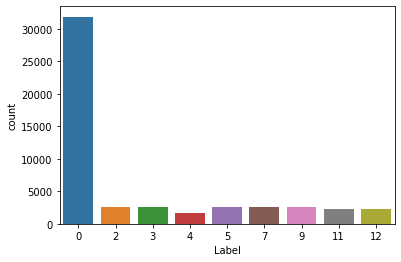

In [23]:
sns.countplot('Label', data=train_feature_dict["CpuTemperature_3"])

In [21]:
train_feature_dict["CpuTemperature_3"]["Label"]

0         0
1         0
2         0
3         0
4         0
         ..
51036    12
51037    12
51038    12
51039    12
51040    12
Name: Label, Length: 51041, dtype: int64

In [20]:
for i in train_feature_dict:
    for j in range(45000,51041):
        if train_feature_dict[i]["Label"][j]==1:
            train_feature_dict[i]["Label"][j]=11
        elif train_feature_dict[i]["Label"][j]==2:
            train_feature_dict[i]["Label"][j]=12

<ipython-input-20-609ce90bb44a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature_dict[i]["Label"][j]=12


In [ ]:
for i in train_feature_dict:
    train_feature_dict[i]=train_feature_dict[i].astype("float64")

In [24]:
for i in train_feature_dict:
    for j in range(0,len(train_feature_dict[i])):
            if train_feature_dict[i]["Label"][j]!=0:
                train_feature_dict[i]["Label"][j]=1

<ipython-input-24-c2fec8a9d106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feature_dict[i]["Label"][j]=1


D:\anaconda\envs\ML_class\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

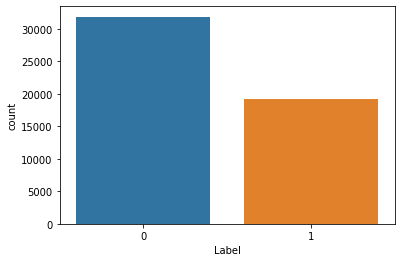

In [25]:
sns.countplot('Label', data=train_feature_dict["CpuTemperature_3"])

In [26]:
#存入pickle
with open('Step_1_train_model.pickle', 'wb') as handle:
    pickle.dump(train_feature_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open('Step_1_train_model.pickle', 'rb') as handle:
        train_feature_dict= pickle.load(handle)
for i in train_feature_dict:
    y=train_feature_dict[i]["Label"]
    x=train_feature_dict[i].drop(["Label"],axis=1)
    model = XGBClassifier()
    model.fit(x, y,eval_metric = "logloss")
    with open(i+'.pickle.dat', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
with open('CpuTemperature_3'+'.pickle.dat', 'rb') as f:
    model = pickle.load(f)

In [8]:
model.predict(x)

D:\anaconda\envs\ML_class\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)